In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

In [18]:
data = pd.read_csv('apple_share_price.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321


In [73]:
data['OHLC'] = (data['Open']+data['High']+data['Low']+data['Close'])/4
processed_data = np.array(data['OHLC'].values)
processed_data[:10]

array([157.18  , 157.4625, 160.175 , 159.695 , 157.865 , 156.3875,
       156.2125, 158.0825, 149.445 , 149.2725])

In [74]:
scaler_min = np.min(processed_data)
scaler_max = np.max(processed_data)

processed_data = (processed_data - np.min(processed_data))/(np.max(processed_data)-np.min(processed_data))
processed_data[:5]

array([0.97398819, 0.97644172, 1.        , 0.99583116, 0.97993747])

In [39]:
window = 24
X_train = []
Y_train = []
for i in range(window, len(processed_data)):
    X_train.append(processed_data[i-window:i])
    Y_train.append(processed_data[i])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1230, 24, 1) (1230,) (410, 24, 1) (410,)


In [40]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [62]:
model = Sequential([
    LSTM(16, return_sequences=True),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='linear')
])
model.compile(optimizer='adagrad', loss='mse', metrics=[RootMeanSquaredError])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
early_stopping = EarlyStopping(monitor='val_root_mean_squared_error', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, batch_size=32, callbacks=[early_stopping])

Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2106 - root_mean_squared_error: 0.4578 - val_loss: 0.1125 - val_root_mean_squared_error: 0.3355
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1084 - root_mean_squared_error: 0.3291 - val_loss: 0.0720 - val_root_mean_squared_error: 0.2683
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0720 - root_mean_squared_error: 0.2679 - val_loss: 0.0529 - val_root_mean_squared_error: 0.2301
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0473 - root_mean_squared_error: 0.2170 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2094
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1989
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0385 - root_mean_squared_error: 0.1961 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1927
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

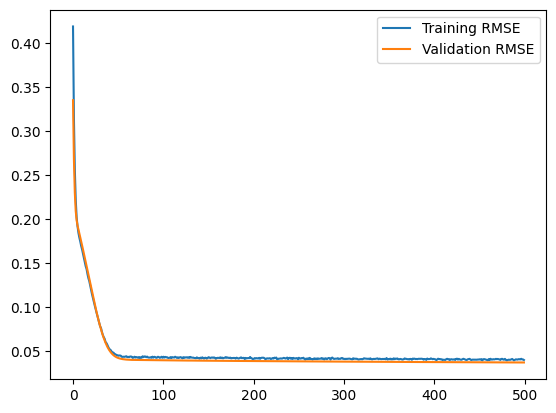

In [64]:
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.legend()

In [79]:
X_pred = processed_data[-window:]
Y_pred = []
for i in range(30):
    x_pred = X_pred.reshape((1,len(X_pred),1))
    pred = model.predict(x_pred)
    Y_pred.append(pred.item())
    X_pred = X_pred[1:]
    X_pred = np.append(X_pred, Y_pred[-1])
Y_pred = [round(y*(scaler_max - scaler_min) + scaler_min,2) for y in Y_pred]
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━

[47.8,
 47.74,
 47.68,
 47.61,
 47.54,
 47.49,
 47.43,
 47.36,
 47.29,
 47.24,
 47.2,
 47.16,
 47.12,
 47.05,
 47.0,
 46.92,
 46.85,
 46.79,
 46.73,
 46.67,
 46.63,
 46.58,
 46.54,
 46.5,
 46.47,
 46.41,
 46.36,
 46.31,
 46.25,
 46.2]